In [1]:
from torchvision import datasets, transforms
from torchvision.transforms.functional import to_pil_image
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
train_dataset = datasets.MNIST(
    root = "data",
    download = True,
    train = True,
    transform = transforms.ToTensor()
)

test_dataset = datasets.MNIST(
    root = "data",
    download = True,
    train = False,
    transform = transforms.ToTensor()
)

In [3]:
def drawImage_10(img_data):
    fig = plt.figure(figsize=(5,5))
    img_count = 10
    row = 5
    col = 2
    for i in range(img_count):
        img = img_data.data[i]
        ax = fig.add_subplot(col, row, i+1)
        ax.imshow(to_pil_image(img))
        ax.axis('off')
        ax.set_title('train' + str(i+1))
    plt.show()

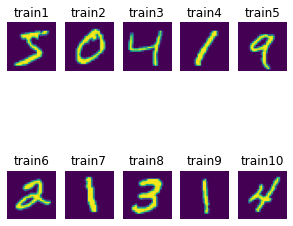

In [4]:
drawImage_10(train_dataset)

In [5]:
train_dataset.data[0].shape

torch.Size([28, 28])

In [6]:
class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1,20,5,1),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(20,50,5,1),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )
        self.fc1 = nn.Sequential(
            nn.Linear(4*4*50, 500),
            nn.ReLU()
        )
        self.fc2 = nn.Sequential(
            nn.Linear(500, 10),
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(-1, 4*4*50)
        x = self.fc1(x)
        x = self.fc2(x)
        out = F.log_softmax(x)
        return out

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1) # input, output, kernel_size, stride
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [59]:
class DNN(torch.nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU()
        )
        self.fc2 = nn.Sequential(
            nn.Linear(128, 64),
            nn.ReLU()
        )
        self.fc3 = nn.Sequential(
            nn.Linear(64, 32),
            nn.ReLU()
        )
        self.fc4 = nn.Sequential(
            nn.Linear(32, 10),
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        return x

In [60]:
batch_size = 64
epochs = 10
lr = 0.01
device = "cuda" if torch.cuda.is_available() else "cpu"

In [61]:
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

In [62]:
model = DNN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = lr)
criterion = torch.nn.CrossEntropyLoss()

In [63]:
for epoch in range(epochs):
    ep_loss = []
    for X,y in train_loader:
        X = X.to(device)
        y = y.to(device)

        optimizer.zero_grad()
        pred = model(X)
        loss = criterion(pred,y)
        ep_loss.append(loss.item())
        loss.backward()
        optimizer.step()
    print(f'[{epoch+1}/{epochs}] Loss : {sum(ep_loss)/len(ep_loss)}')

[1/10] Loss : 0.26426843547824225
[2/10] Loss : 0.1498347085966135
[3/10] Loss : 0.12577592264235354
[4/10] Loss : 0.11171160016478454
[5/10] Loss : 0.10994106250604603
[6/10] Loss : 0.09791252413131138
[7/10] Loss : 0.09238529284696913
[8/10] Loss : 0.08605816910765184
[9/10] Loss : 0.07973831618338255
[10/10] Loss : 0.0821990154307288


In [64]:
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          shuffle=True,
                                          batch_size=64)

In [65]:
model.eval()
acc_count = 0
with torch.no_grad():
    for X,y in test_loader:
        X = X.to(device)
        y = y.to(device)
        prediction = model(X)
        prediction = torch.argmax(prediction,dim=1)
        acc_count += prediction.eq(y.view_as(prediction)).sum().item()
print(f'acc : {acc_count/len(test_loader.dataset)}')


acc : 0.9711


In [76]:
import click
from datetime import datetime
@click.command()
@click.option("--dt", required=True, type=click.DateTime(["%Y-%m-%d"]))
@click.option("--who", required=True, type=click.Choice(["혼자", "함께"]))
def main(dt: datetime, who: str):
    print(f"{dt.date()}, {who} 가보자고!")

SyntaxError: invalid syntax (2676515417.py, line 1)